code to create a baseline pandemic flu simulation


In [238]:
import pandas as pd
import numpy as np
from scipy.spatial import distance_matrix
from random import randrange,randint,uniform
from timeit import default_timer as timer
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
import numpy as np
print("Hello Github 125")
threshold=6
cfr=0.1
quarantine=True

Hello Github 125


Initializing a dataframe of 1000 'people' in a 2-dimensional space with various attributes. 

In [239]:
def initialize():
    num_ppl = 1000

    # various attributes of each person
    per_num = []
    x_pos = []
    y_pos = []
    infected = []
    time_infected = []
    recovered = []
    immune = []
    alive = []


    #for person number, x_pos and y_pos, we set these for each individaul
    size_min = 0
    size_max = 500
    for i in range(0,num_ppl):
        per_num.append(i)
        x_pos.append(np.random.randint(size_min,size_max))
        y_pos.append(np.random.randint(size_min,size_max))


    # for infected, time_infected, and alive, we set these for all people to start with default values
    infected = [0]*num_ppl
    time_infected = [np.NaN]*num_ppl
    alive = [1]*num_ppl
    recovered = [0]*num_ppl
    immune = [0]*num_ppl

    population = pd.DataFrame(list(zip(per_num, x_pos, y_pos, infected, time_infected, recovered, immune, alive)),
                              columns = ["per_num", "x_pos", "y_pos", "infected",  
                                         "time_infected", "recovered", "immune","alive"])
    rand=[randint(0, 1000) for p in range(0, 20)]
    print(rand)
    population.loc[rand, 'infected'] = 1
    population.loc[rand, 'time_infected'] = 0
    print(population)
    return population

Now we infect patient 0 in our pandemic 

Setting up parameters and logs for the simulation

In [240]:
def initiate_distance_matrix(population):
    
    # Setting parameters for movement of our simulated people 
    #the average person moves X units on the x axis and 10 units in the y axis. 
    movement = 10
    move_sdev = 5

    Num_days = 50

    #creating a log for the movement of patient zero (who we infect) & a random person (we'll pick person 25)

    p_zero = {'day':[], 'xpos':[], 'ypos':[]}

    p_rand = {'day':[], 'xpos':[], 'ypos':[]}

    infected_array = population.loc[(population['infected'] == 1), 'x_pos':'y_pos']
    pop_pos_array = population.loc[:, 'x_pos':'y_pos']

    #Initial distance matrix
    mtx0 = distance_matrix( pop_pos_array, infected_array)
    # display(mtx0)
    # print(mtx0.shape)

    # s2=timer()
    # result = [np.where((row < threshold)) for row in mtx0]
    # idx=0
    # ctr3=0
    # for proximity in result:
    #     if(len(proximity[0])>0):
    #         print("indices: ",idx)
    #         ctr3+=1

    #     idx+=1
    # e2=timer()
    # print(ctr3)
    # print("time taken:",e2-s2)

    # s3=timer()

    # ctr=0
    # for p in range(0,num_ppl):
    #     for infected_dist in mtx0[p]:
    #         if infected_dist <= 6:
    #             print(p)
    #             ctr+=1
    # e3=timer()
    # print("number of ppl in the proximity:",ctr)
    # print("time taken:",e3-s3)

            

Running the simulation

[252, 194, 563, 74, 287, 418, 873, 269, 888, 589, 832, 152, 704, 471, 651, 79, 871, 479, 979, 327]
     per_num  x_pos  y_pos  infected  time_infected  recovered  immune  alive
0          0    210    461         0            NaN          0       0      1
1          1    203     91         0            NaN          0       0      1
2          2    261    476         0            NaN          0       0      1
3          3    230    302         0            NaN          0       0      1
4          4    469    334         0            NaN          0       0      1
..       ...    ...    ...       ...            ...        ...     ...    ...
995      995    132    372         0            NaN          0       0      1
996      996    387    147         0            NaN          0       0      1
997      997    342    399         0            NaN          0       0      1
998      998     22     53         0            NaN          0       0      1
999      999    307     25         0       

,day,new_infections,infected,recovered,immune,alive
0,0,27,47,0,0,1000
1,1,25,72,0,0,1000
2,2,20,92,0,0,1000
3,3,31,123,0,0,1000
4,4,27,150,0,0,1000
5,5,20,170,0,0,1000
6,6,25,195,0,0,1000
7,7,21,216,0,0,1000
8,8,19,235,0,0,1000
9,9,18,253,0,0,1000


[455, 631, 59, 694, 580, 21, 551, 620, 716, 796, 67, 478, 133, 546, 521, 636, 541, 947, 84, 624]
     per_num  x_pos  y_pos  infected  time_infected  recovered  immune  alive
0          0     96    249         0            NaN          0       0      1
1          1    121    225         0            NaN          0       0      1
2          2    308      0         0            NaN          0       0      1
3          3    401    356         0            NaN          0       0      1
4          4     94    395         0            NaN          0       0      1
..       ...    ...    ...       ...            ...        ...     ...    ...
995      995    285     37         0            NaN          0       0      1
996      996    225    163         0            NaN          0       0      1
997      997      8    442         0            NaN          0       0      1
998      998    203     16         0            NaN          0       0      1
999      999    291     45         0         

,day,new_infections,infected,recovered,immune,alive
0,0,28,48,0,0,1000
1,1,18,66,0,0,1000
2,2,37,103,0,0,1000
3,3,41,144,0,0,1000
4,4,42,186,0,0,1000
5,5,55,241,0,0,1000
6,6,72,313,0,0,1000
7,7,62,375,0,0,1000
8,8,66,441,0,0,1000
9,9,73,514,0,0,1000


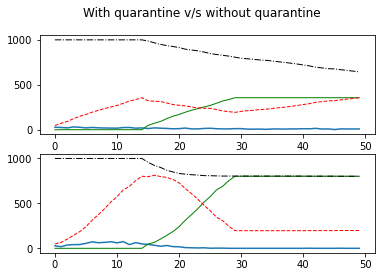

In [241]:
def movePeopleUsingDistribution(population):
    for p in range(0,num_ppl):
        #next, adjust movement (right now, everyone moves an average of 10 units each day)
        #the first part creates a random variable from a normal dist. the second determines if it is positive or negative
        x_move = np.random.normal(movement,move_sdev) * (-1 + 2*np.random.binomial(1,0.5))
        y_move = np.random.normal(movement,move_sdev) * (-1 + 2*np.random.binomial(1,0.5))

        if ((population.loc[p,'x_pos'] + x_move) < size_max) & ((population.loc[p,'x_pos'] + x_move) > size_min) :
            population.loc[p,'x_pos'] = population.loc[p,'x_pos'] + x_move
        else: 
            population.loc[p,'x_pos'] = population.loc[p,'x_pos'] - x_move

        if ((population.loc[p,'y_pos'] + y_move) < size_max) & ((population.loc[p,'y_pos'] + y_move) > size_min) :
            population.loc[p,'y_pos'] = population.loc[p,'y_pos'] + y_move
        else: 
            population.loc[p,'y_pos'] = population.loc[p,'y_pos'] - y_move
    return population

def movePeopleRandomly(population):
    population['x_pos'] = [random.uniform(size_min,size_max) for i in range(0,num_ppl)]
    population['y_pos'] = [random.uniform(size_min,size_max) for i in range(0,num_ppl)]
    return population


# start = timer()
# movePeopleUsingDistribution(population)
# end = timer()
# print("distribution: ",end-start)


# start1 = timer()
# movePeopleRandomly(population)
# end1 = timer()
# print("random positions: ",end1-start1)

def simulate(population,axs):
    #creating a log for the simulation at each day
    results = {'day':[], 'new_infections':[], 'infected':[], 'recovered':[], 'immune':[], 'alive':[]}

    mtx = mtx0

    for day in range(0, Num_days):
        t11=timer()

        new_infections = 0

        #loop through the population to determine status, and then change their position
        for p in range(0,num_ppl):
            #first determine if they were infected
            t1=timer()
            if population.loc[p,'infected'] == 0 and population.loc[p,'immune'] == 0:
                if(any(mtx[p]<=threshold)):
                    population.loc[p,'infected'] = 1
                    population.loc[p,'time_infected'] = day
                    new_infections += 1
    #                 print('person {p} infected on day {d}'.format(p = p, d = day))
            t2=timer()         
    #         print("time taken for new infections:",t2-t1)

            t3=timer()
            #next, for sick people, determine if they are better
            if (population.loc[p,'infected'] == 1 and population.loc[p,'alive'] == 1 and  (day - population.loc[p,'time_infected']) >14):
                population.loc[p,'infected'] = 0
                population.loc[p,'immune'] = 1
                population.loc[p,'recovered'] = 1
            t4=timer()         
    #         print("time taken for recoveries:",t4-t3)    



            t5=timer()
            #next, adjust movement (right now, everyone moves an average of 10 units each day)
            #the first part creates a random variable from a normal dist. the second determines if it is positive or negative
            x_move = np.random.normal(movement,move_sdev) * (-1 + 2*np.random.binomial(1,0.5))
            y_move = np.random.normal(movement,move_sdev) * (-1 + 2*np.random.binomial(1,0.5))
            if not(quarantine and population.loc[p,'infected'] == 1):
                if ((population.loc[p,'x_pos'] + x_move) < size_max) & ((population.loc[p,'x_pos'] + x_move) > size_min) :
                    population.loc[p,'x_pos'] = population.loc[p,'x_pos'] + x_move
                else: 
                    population.loc[p,'x_pos'] = population.loc[p,'x_pos'] - x_move

                if ((population.loc[p,'y_pos'] + y_move) < size_max) & ((population.loc[p,'y_pos'] + y_move) > size_min) :
                    population.loc[p,'y_pos'] = population.loc[p,'y_pos'] + y_move
                else: 
                    population.loc[p,'y_pos'] = population.loc[p,'y_pos'] - y_move

            t6=timer()
    #         print("new positions:",t6-t5)
            #now we need to make a new distance matrix
            infected_array_day = population.loc[(population['infected'] == 1), 'x_pos':'y_pos']
            pop_pos_array_day = population.loc[:, 'x_pos':'y_pos']

        list_of_infected=np.where((population["infected"] ==1) & (population["alive"]==1) & (population["time_infected"]>14))[0]
        num_of_infected=len(list_of_infected)
        new_deaths=round(num_of_infected)
#         print(type(list_of_infected[0:]))
#         print(new_deaths)
#         print(list_of_infected.tolist())
#         print(type(list_of_infected.tolist()))
        pop_death_indices=random.sample(list_of_infected.tolist(), new_deaths)
        population.loc[pop_death_indices,'alive']=0;
        
        
            
        t7=timer()
        #updated distance matrix
        mtx = distance_matrix( pop_pos_array_day, infected_array_day)
        t8 = timer()
    #         print("new distance matrix:",t8-t7)



        #update the log each day: 
        #path of patient zero
        p_zero['day'].append(day)
        p_zero['xpos'].append(population.loc[0,'x_pos'])
        p_zero['ypos'].append(population.loc[0,'y_pos'])

        #path of a random person (25)
        p_rand['day'].append(day)
        p_rand['xpos'].append(population.loc[25,'x_pos'])
        p_rand['ypos'].append(population.loc[25,'y_pos'])

        #overall results

        tot_infected = sum(population['infected'] == 1)
        tot_recovered = sum(population['recovered'] == 1)
        tot_immune = sum(population['immune'] == 1)
        tot_alive = sum(population['alive'] == 1)
        results['day'].append(day)
        results['new_infections'].append(new_infections)
        results['infected'].append(tot_infected)
        results['recovered'].append(tot_recovered)     
        results['immune'].append(tot_immune)  
        results['alive'].append(tot_alive)
        t12=timer()
    #     print("overall one day simulations:",t12-t11)

        print('Day {0} | {1} newly infected | {2} total infected | {3} have recovered'.format(day, new_infections, tot_infected, tot_recovered))
    res=pd.DataFrame(results)
    display(res)
    axs.plot(results["day"], results["new_infections"],label="new_infections")
    axs.plot(results["day"], results["recovered"], color='green',linewidth=1.0,label="recovered")
    axs.plot(results["day"], results["infected"],color='red', linewidth=1.0, linestyle='--',label="infected")
    axs.plot(results["day"], results["alive"],color='black', linewidth=1.0, linestyle='-.',label="alive")

fig, axs = plt.subplots(2)
fig.suptitle('With quarantine v/s without quarantine')
pop1=initialize()
initiate_distance_matrix(pop1)
simulate(pop1,axs[0])



quarantine=False
pop2=initialize()
initiate_distance_matrix(pop2)
simulate(pop2,axs[1])
plt.show()

In [242]:
# pd.DataFrame(p_zero)

In [243]:
print(np.random.normal(movement,move_sdev)*(-1 + 2*np.random.binomial(1,0.5)))

8.746414176623855
